<h2> Python Data Visualization for EDA (exploratory data analysis) Project </h2>

This is a DataQuest guided project, where the pandas plotting functionality is used to explore data quickly using visualizations. 

We'll be working with a dataset on the job outcomes of students who graduated from college in 2010-2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their  <a href="https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv">Github repo</a> 

***

Each row of the data represents an observation of a single college major and the columns hold the variables on gender diversity, employment rates, median salaries etc. These are some of the columns:

&nbsp; | &nbsp;
------ | -----
    Rank | Rank by median earnings (the dataset is ordered by this column).
    Major_code | Major code.
    Major | Major description.
    Major_category | Category of major.
    Total | Total number of people with major.
    Sample_size | Sample size (unweighted) of full-time.
    Men | Male graduates.
    Women | Female graduates.
    ShareWomen | Women as share of total.
    Employed | Number employed.
    Median | Median salary of full-time, year-round workers.
    Low_wage_jobs | Number in low-wage service jobs.
    Full_time | Number employed 35 hours or more.
    Part_time | Number employed less than 35 hours.

I'll be using data-viz to help answer questions from the data such as:

<ul>
  <li> Do students in more popular majors make more money?
    <ul>
      <li>Using scatter plots - the most useful graph for displaying bivariate data - the relationship between two quantitative variables.
</li>
    </ul>
  </li>
 
   <li>     How many majors are predominantly male? Predominantly female?    
    <ul>
      <li>Using histograms - to plot binned quantitative data and show distributions of variables. <br>
          Histograms are most commonly used to summarize the distribution of univariate data - to show its frequency distributions. The number of occurences of each separate value in a continuous or discrete dataset.</li>
    </ul>
  </li>
    <li>     Which category of majors have the most students?   
        <ul>
          <li> Using bar plots - to plot categorical data and  compare categorical variables. </li>
        </ul>
     </li>
</ul>

Firstly, we'll import the libraries we need and remove rows containing null values.

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

#displays plots inline
%matplotlib inline

In [129]:
recent_grads = pd.read_csv('recent-grads.csv')

# return the first row's values (iloc[] row based indexing) formatted as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [130]:
# DataFrame.head  - return (default 5) rows to get overview of the structure
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [131]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [132]:

# Generate descriptive statistics for all of the numeric columns
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [133]:

# Count the number of non-NA values
recent_grads['Median'].count()

173

In [134]:
#Finds sum of rows in recent_grads and assigns the value to raw_data_count
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [135]:
#DataFrame.dropna - clean data - drop rows containing missing values 
#then assign the resulting DataFrame back to recent_grads

recent_grads = recent_grads.dropna()

#Find rows sum recent_grads again and assign the value to cleaned_data_count. 
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


Upon comparing the variables - cleaned_data_count to raw_data_count,
we notice that only one row contained missing values and was dropped.

<h4>Correlation Matrix Of Values</h4>
   Relying on the interpretation of a scatterplot is too subjective. 
   More precise evidence is needed.
   It is obtained by computing a coefficient 
   that measures the strength of the relationship under investigation.
   The correlation coefficient takes on values ranging between +1 and -1, which I shall reference from the below table in the scatterplot interpretations.

In [136]:
recent_grads.corr(method='pearson')

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.097195,0.071137,-0.094780,0.174913,0.643781,0.004590,0.066941,0.030748,0.190272,0.016402,0.086736,0.076671,-0.872303,-0.737419,-0.800817,0.048950,0.141661,0.200360
Major_code,0.097195,1.000000,0.196784,0.179299,0.181459,0.259211,0.203375,0.197345,0.195857,0.191798,0.202203,0.220472,0.137163,-0.167237,-0.165593,-0.083655,0.036486,0.229562,0.222541
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.004590,0.203375,0.945575,0.875176,0.862606,0.097496,1.000000,0.964406,0.978362,0.824544,0.985212,0.917934,0.062955,-0.064475,-0.024429,-0.052256,0.701231,0.915335,0.860116
Employed,0.066941,0.197345,0.996214,0.870605,0.944037,0.147547,0.964406,1.000000,0.995831,0.934418,0.991031,0.968855,0.071374,-0.104399,-0.066706,-0.083996,0.797193,0.941236,0.927122
Full_time,0.030748,0.195857,0.989339,0.893563,0.917681,0.120200,0.978362,0.995831,1.000000,0.900711,0.998200,0.960042,0.066616,-0.079031,-0.042131,-0.061429,0.772135,0.933021,0.904714
Part_time,0.190272,0.191798,0.950268,0.751592,0.954513,0.212290,0.824544,0.934418,0.900711,1.000000,0.880656,0.945009,0.112247,-0.187516,-0.152827,-0.155224,0.804673,0.909495,0.951525



<h4>EDA</h4>
Before researching the relationship between two quantitative variables, it is always helpful to create a graphical representation that includes both of these variables.
A scatterplot is such a graph and I shall now create scatterplots to explore the data - to check the relationship that may or may not exist between two variables.

36000.0
40076.74418604651
11461.38877329179


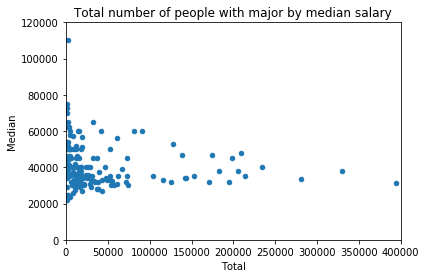

In [137]:
# pandas.DataFrame.plot
# we call the plot() method, passing in the data we want plotted as well as the type of plot. 
# x,y to specify axis labels
graph = recent_grads.plot(x='Total', y='Median', kind='scatter')
graph.set_title('Total number of people with major by median salary')
graph.set_xlim(0,400000)
graph.set_ylim(0,120000)

print(recent_grads['Median'].median())
print(recent_grads['Median'].mean())

#Sample standard deviation of Median salary values
print(recent_grads['Median'].std())

 
   <ul>
  <li>Do students in more popular majors make more money?
      <ul>
          <li>From looking at the graph, I do not see a normal distribution and the data is highly-right skewed with the peak on the left and a long tail to the right. The form of the relationship seems linear and there appears to be a weak-negative-linear relationship between Total and Median with the dependent variable on the y-axis slightly decreasing as the independent variable increases along x. </li>
          <li>There is a concentration of points in the bottom-left quadrant, where the not as popular majors are located with a large range of values, but the majority of the medians  are clustered in the 30-45K range for the middle 50% .There is a relationship for many datapoints where - as their x-axis values increase, their median on the y-axis decreases, but overall still stay in the middle 50% of medians as totals increase along x, with the most popular majors in close range of the overall median salary of 36K.
             <br> Without doing a log transformation of the skewed distribution to reduce skew and bearing in mind that correlation is not causation, I would conclude that there is either no correlation as the correlation is close to zero or there is a weak-negative correlation with a correlation coefficient of (-0.106) as per the correlation matrix above. Without further research it cannot be ascertained why there is a weak-negative correlation.</li>
      </ul>
  </li>
    </ul>
  </li>
</ul>

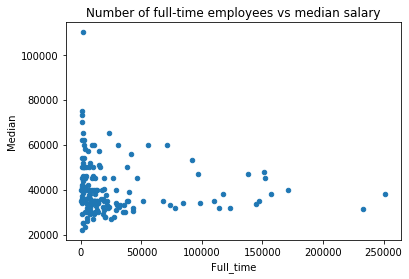

In [138]:
recent_grads.plot(x='Full_time', y='Median', kind = 'scatter'
                 ,title='Number of full-time employees vs median salary')

 <ul>
   <h4> <li> Is there any link between the number of full-time employees and median salary?</li></h4>
    <ul>
    Looking at the graph there seems to be no strong relation between the numerical variables for number of full time employees - number employed 35 hours or more (independent variable) and the median salary (dependent).
As Median increases, there is not much change for the number of full time employees.
<br><br>
The form of the relationship seems linear and so this weak association is verified with the correlation coefficient of -0.07 in the above correlation matrix.
</ul>
</ul>

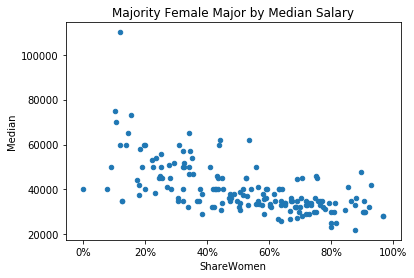

In [139]:
import matplotlib.ticker as mtick
ax = recent_grads.plot(x='ShareWomen', y='Median', kind = 'scatter',
                  title='Majority Female Major by Median Salary')


ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

<ul><li>    <h4>Do students that majored in subjects that were majority female make more money?</h4></li><ul>
    <br>
    <li>On the whole, the answer is no. We are comparing the share of females for a major vs the median salary for the major and on the whole the two variables are inversely correlated. As the share of female graduates for a major increases, the lower the median salary is.<br><br>The strength of the relationship is moderate with a negative correlation (r=-0.61) which demonstrates a moderate connection between the two variables. This value is quite close to (r= –0.70) the boundary for being considered a strong negative - downward sloping - linear relationship.
    </li>
</ul>

In [140]:
#recent_grads[recent_grads['ShareWomen'] > 0.5].median()
sw = recent_grads[recent_grads['ShareWomen']>0.5 ][['ShareWomen', 'Median']]
sw.median()


#print(recent_grads['Median'].median())
#print(recent_grads['Median'].mean())

ShareWomen        0.689555
Median        34000.000000
dtype: float64

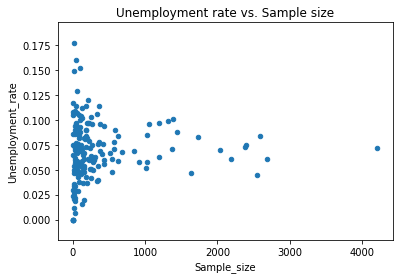

In [141]:
# Sample size and unemployment rate
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter'
                          ,title='Unemployment rate vs. Sample size')


<h4>Unemployment rate vs. Sample size</h4>
The form of the relationship seems linear again and it seems to be very weak with a positive correlation coefficient of 0.06. This indicates that while both variables tend to go up in response to each another, the relationship is very weak. Since values between 0 and 0.3 indicate a weak positive linear relationship.

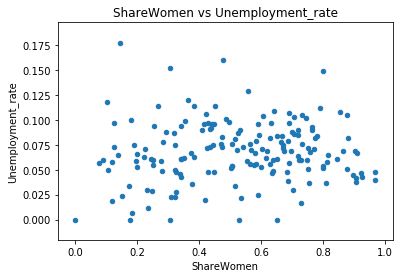

In [142]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind = 'scatter'
                 ,title="ShareWomen vs Unemployment_rate")

<h4>ShareWomen vs Unemployment rate</h4>
        Here we are comparing women as share of the total to the unemployment rate.From looking at the scatterplot, the relationship does not form in a linear pattern and so there might not be any positive or negative association. <br>    Calculating a Pearson correlation coefficient requires the assumption that the relationship between the two variables is linear. As the clusters appears nonlinear here, any conclusion based on it is debatable. 
<br>However, assuming it is somewhat linear, there is a weak positive correlation coefficient of 0.07 (zero meaning no linear relationship). This indicates that while both variables tend to go up in response to each other - as ShareWomen increases so does Unemployment_rate - the association is very weak. 

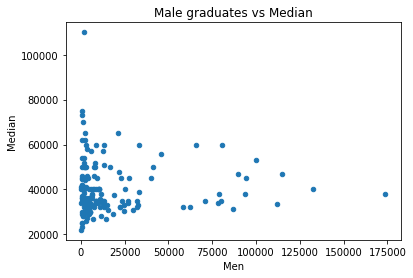

In [143]:
recent_grads.plot(x='Men', y='Median', kind = 'scatter',
                 title="Male graduates vs Median")

<h4>Men vs Median</h4>
Here we are comparing male graduates to the median salary of full-time, year-round workers.
A line is difficult to detect, which makes sense as the the points have almost no direction and the relationship is weak (r = 0.02). This makes sense, since a line does not fit to the points on the graph and since as the men increase the median clearly does not increase by the same factor. 

<h4>Histograms</h4>

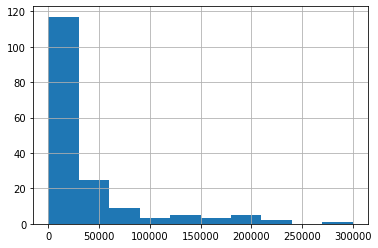

In [144]:
recent_grads['Total'].hist(bins=10, range=(100,300000))

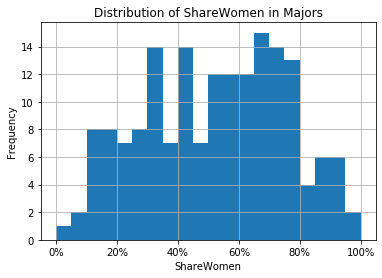

In [145]:
import matplotlib.ticker as mtick
ax=recent_grads['ShareWomen'].hist(bins=20, range=(0,1))
plt.title("Distribution of ShareWomen in Majors")
plt.ylabel("Frequency")
plt.xlabel("ShareWomen")


ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

<h4>Scatter Matrix Plots</h4>
These are a table of graphs that combine histograms and scatterplots to see all combinations of the variables input.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d43f250>,
      dtype=object)

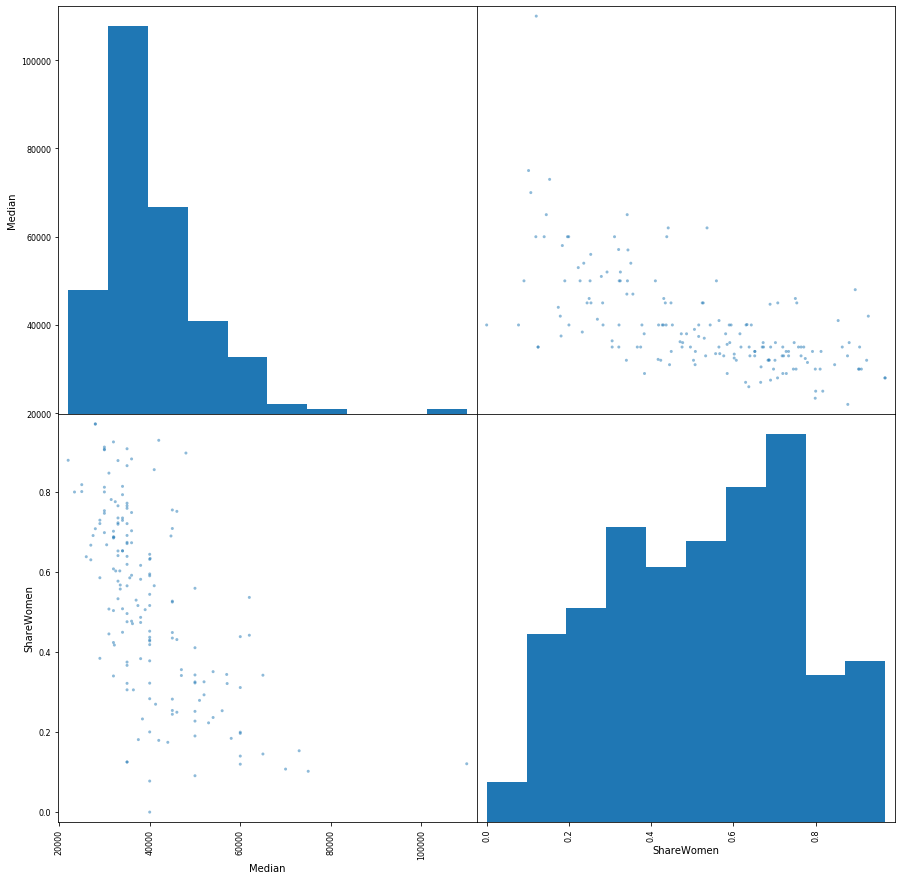

In [146]:
from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[['Median', 'ShareWomen']], figsize = (15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11772b890>,
      dtype=object)

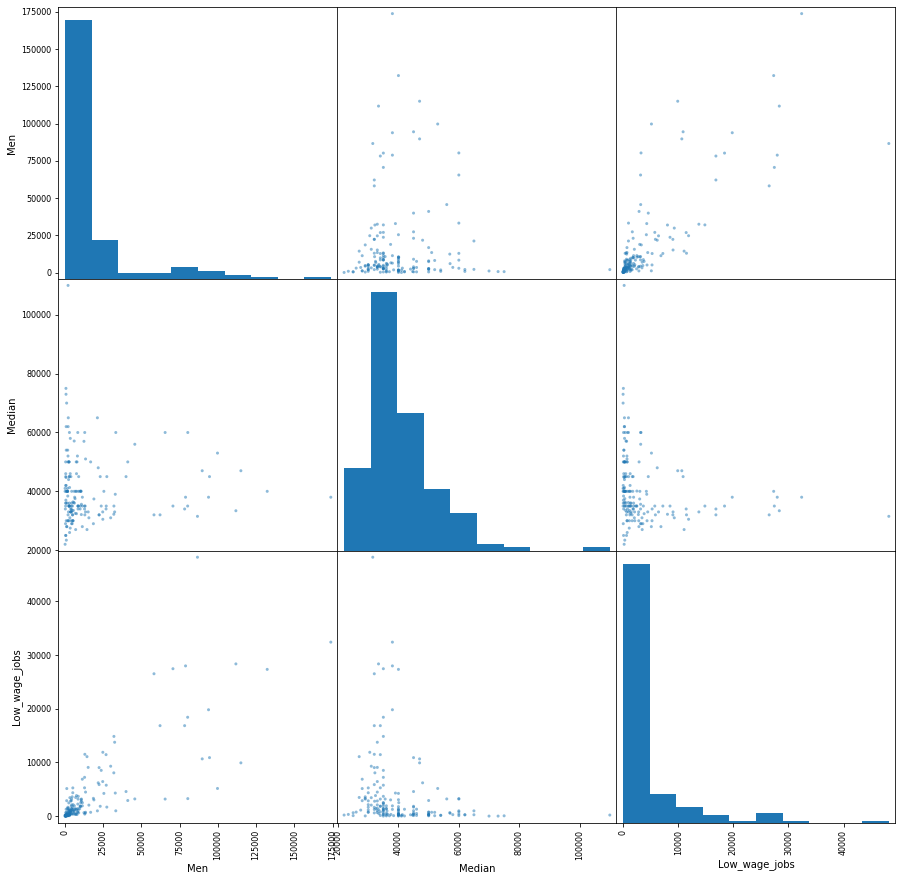

In [147]:
scatter_matrix(recent_grads[['Men', 'Median', 'Low_wage_jobs']], figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1183c0150>,
      dtype=object)

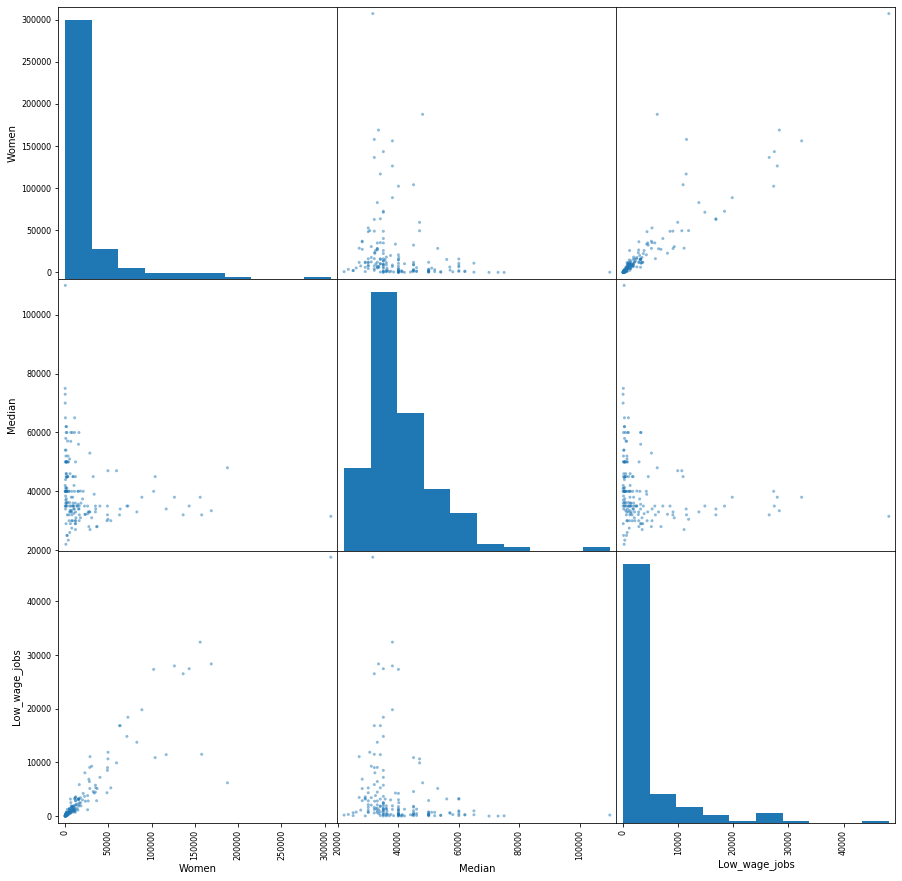

In [148]:
scatter_matrix(recent_grads[['Women', 'Median', 'Low_wage_jobs']], figsize=(15,15))

<h4>Bar Charts</h4><br>
Here I shall construct bar plots with their bars arranged in numerical order aka Pareto charts.

Text(0.5, 0, '')

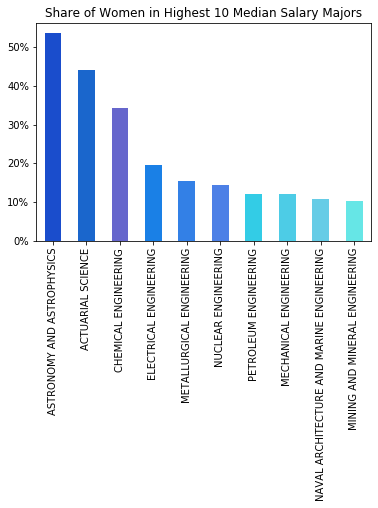

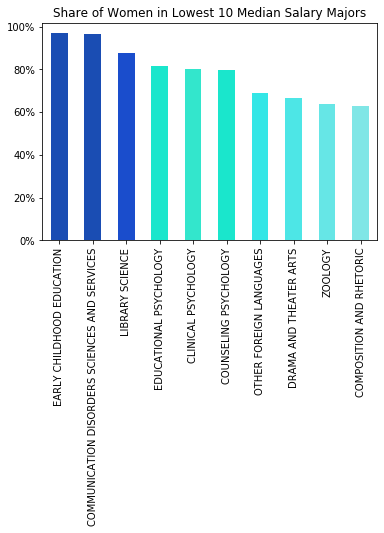

In [149]:
import matplotlib.ticker as mtick



ax =  recent_grads[:10].sort_values("ShareWomen", ascending=False).plot.bar(x='Major', y='ShareWomen',
                                  title='Share of Women in Highest 10 Median Salary Majors',
                                   color=[(0.1, 0.3, 0.8), (0.1, 0.4, 0.8), (0.4, 0.4, 0.8)
                                    ,(0.1, 0.5, 0.9), (0.2, 0.5, 0.9), (0.3, 0.5, 0.9)
                                    ,(0.2, 0.8, 0.9), (0.3, 0.8, 0.9), (0.4, 0.8, 0.9),
                                     (0.4, 0.9, 0.9)]
                                  , legend=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel("")

ax =  recent_grads[-10:].sort_values("ShareWomen", ascending=False).plot.bar(x='Major', y='ShareWomen',
                                  title='Share of Women in Lowest 10 Median Salary Majors',
                                   color=[(0.1, 0.3, 0.7), (0.1, 0.3, 0.7), (0.1, 0.3, 0.8)
                                    ,(0.1, 0.9, 0.8), (0.2, 0.9, 0.8), (0.1, 0.9, 0.8)
                                    ,(0.2, 0.9, 0.9), (0.3, 0.9, 0.9), (0.4, 0.9, 0.9),
                                     (0.5, 0.9, 0.9)]
                                  , legend=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel("")

Let us see what the majors are with a share of women > 80%

In [150]:
sw = recent_grads[recent_grads['ShareWomen']>0.8 ][['ShareWomen', 'Median','Major']].sort_values("Median", ascending=False)
sw

,ShareWomen,Median,Major
34,0.896019,48000,NURSING
51,0.927807,42000,MEDICAL ASSISTING SERVICES
55,0.854523,41000,SCHOOL STUDENT COUNSELING
88,0.881294,36000,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS
100,0.906677,35000,SPECIAL NEEDS EDUCATION
103,0.864456,35000,NUTRITION SCIENCES
113,0.812877,34000,GENERAL EDUCATION
128,0.877228,33000,LANGUAGE AND DRAMA EDUCATION
138,0.923745,32000,ELEMENTARY EDUCATION
148,0.845934,31000,ART HISTORY AND CRITICISM


Let us see what the majors are with a share of men > 80%

In [151]:
sw = recent_grads[recent_grads['ShareWomen']<0.2 ][['ShareWomen', 'Median','Major']].sort_values("Median", ascending=False)
sw

,ShareWomen,Median,Major
0,0.120564,110000,PETROLEUM ENGINEERING
1,0.101852,75000,MINING AND MINERAL ENGINEERING
2,0.153037,73000,METALLURGICAL ENGINEERING
3,0.107313,70000,NAVAL ARCHITECTURE AND MARINE ENGINEERING
5,0.144967,65000,NUCLEAR ENGINEERING
8,0.119559,60000,MECHANICAL ENGINEERING
9,0.196450,60000,ELECTRICAL ENGINEERING
10,0.199413,60000,COMPUTER ENGINEERING
11,0.139793,60000,AEROSPACE ENGINEERING
14,0.183985,58000,ENGINEERING MECHANICS PHYSICS AND SCIENCE


Majors with over 80% males are mainly engineering which might be a factor in the gender pay gap as this is the best paid category. However, that is only a partial explanation as other studies have shown women are paid less within the same category of major.<p> Whether that is also the case here, cannot be explored in this dataset, since in the description of the dataset, the median earnings calculations are based on earnings of an unweighted sample group of full time workers and the only data about these sample groups are their size. 

Text(0.5, 0, '')

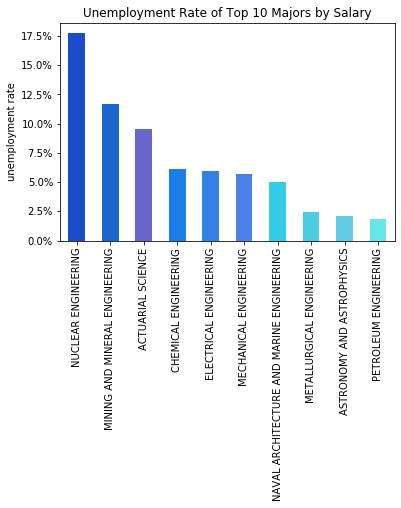

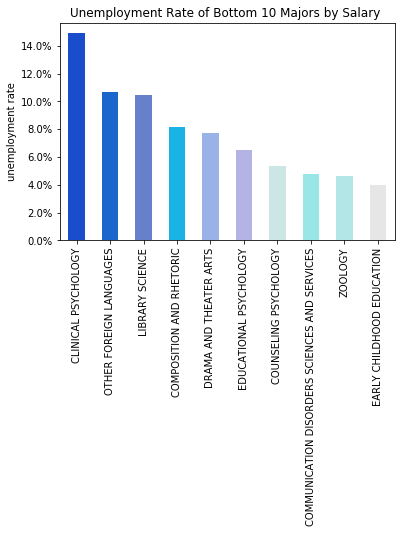

In [152]:
import matplotlib.ticker as mtick

ax =  recent_grads[:10].sort_values("Unemployment_rate", ascending=False).plot.bar(x='Major', 
                                                                            y='Unemployment_rate',
                                  title='Unemployment Rate of Top 10 Majors by Salary',
                                   color=[(0.1, 0.3, 0.8), (0.1, 0.4, 0.8), (0.4, 0.4, 0.8)
                                    ,(0.1, 0.5, 0.9), (0.2, 0.5, 0.9), (0.3, 0.5, 0.9)
                                    ,(0.2, 0.8, 0.9), (0.3, 0.8, 0.9), (0.4, 0.8, 0.9),
                                     (0.4, 0.9, 0.9)]
                                  , legend=False
                                 )

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('unemployment rate')
plt.xlabel("")


ax =  recent_grads[-10:].sort_values("Unemployment_rate", ascending=False).plot.bar(x='Major', 
                                                                            y='Unemployment_rate',
                                  title='Unemployment Rate of Bottom 10 Majors by Salary ',
                                   color=[(0.1, 0.3, 0.8), (0.1, 0.4, 0.8), (0.4, 0.5, 0.8)
                                    ,(0.1, 0.7, 0.9), (0.6, 0.7, 0.9), (0.7, 0.7, 0.9)
                                    ,(0.8, 0.9, 0.9), (0.6, 0.9, 0.9), (0.7, 0.9, 0.9),
                                     (0.9, 0.9, 0.9)]
                                  , legend=False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel('unemployment rate')
plt.xlabel("")



In [153]:
print(recent_grads['Unemployment_rate'].mean())

print(recent_grads[:10]['Unemployment_rate'].mean())
print(recent_grads[-10:]["Unemployment_rate"].mean())

0.06802373423255816
0.06815034360000001
0.0773135073


<h4>Conclusion</h4>

Even though on average the top and bottom ten have an average unemployment rate in close range of the overall dataset, there are a few majors above the mean unemployment rate of 7%. In the bottom ten majors by salary they are - other foreign languages, library science and clinical psychology.In the bottom ten majors by salary they are - nuclear engineering, mining and mineral engineering and actuarial science.

Not many women choose engineering, even though it is the best paid, although these figures do not show what the actual median is for men vs women in engineering. On the whole as the percent of women increases in a major, the median salary for that major decreases. There is an inverse relationship of moderate strength between the two variables. <p>Qualitative research would be needed to provide the analytic depth to help answer the 'why' of the gender pay gap and how to correct it, as quantitative research only provides the big picture by answering closed-ended questions like 'how many?'.